# Model Testing & Insights Based On The Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import collections
from sklearn.cluster import KMeans
df = pd.read_csv('ted_main/ted_main.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [2]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [3]:
# make separate dataframe called ratings_df for the 14 different ratings given
r = []
num_ratings = []
for x in range(2550):
    dict_rating = {}
    num_ratings = 0
    ratings = eval((df.ratings[x]))
    for i in ratings:
        num_ratings+=i['count']
        dict_rating[i['name']] = i['count']
    dict_rating['Total'] = num_ratings
    r.append(dict_rating)
ratings_df = pd.DataFrame(r)

In [4]:
# displaying top 5 values for each column in ratings_df
ratings_df.head()

,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,Total
0,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,93850
1,544,58,56,139,113,62,443,132,258,268,116,203,131,413,2936
2,964,60,183,45,78,27,395,166,104,230,54,146,142,230,2824
3,59,291,105,760,53,32,380,132,36,460,230,85,35,1070,3728
4,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893,25620


## K-Means Clustering Model

We have calculated weights for each of the adjectives and then, took a dot product of normalized counts and the weights to get a value for each talk. These values after being scaled to the range of 0-10 are given as input to the weighted K-Means Clustering Model, wherein weights are the total counts for each talk signifying that talks having higher rating would be given a higher weight.  

The weighted K-Means Clustering Model outputs 11 clusters and the labels given by the model are taken as the numeric rating for each talk which is then added to the dataset as a separate column called 'NumericRating'.  

We also compute the negativity percentage in each talk as a ratio of the sum of 

In [5]:
# obtain the weights for each adjective as a ratio of the ratings count for that adjective with the total number 
# of ratings of all adjectives

# positivity indicates the positiveness or negativeness of an adjective
# ex: Funny: 1, Unconvincing: -1
positivity = [1, 1, 1, 1, -1.5, -1.5, 1, 1, -1.5, 1, 1, 1, -1.5, 1]

new_wt = []

# total number of ratings overall
total_ratings = ratings_df['Total'].sum()

for column in ratings_df.columns:
    if column!='Total':
        # weight for each adjective is ratio of rating count of that adjective and the total rating count
        val = ratings_df[column].sum()/total_ratings
        val = np.round(val, decimals=3)
        new_wt.append(val)
        
print("Weights Before Multiplying With Positivity Matrix")
print(new_wt)
new_wt = np.multiply(new_wt,positivity)
print("\nWeights After Multiplying With Positivity Matrix")
print(new_wt)

weights = new_wt

Weights Before Multiplying With Positivity Matrix
[0.063, 0.079, 0.062, 0.068, 0.013, 0.009, 0.143, 0.129, 0.022, 0.09, 0.061, 0.033, 0.011, 0.218]

Weights After Multiplying With Positivity Matrix
[ 0.063   0.079   0.062   0.068  -0.0195 -0.0135  0.143   0.129  -0.033
  0.09    0.061   0.033  -0.0165  0.218 ]


In [6]:
# matrix for storing negative percentage of each talk
neg_ratios = []

# matrix to store values for each talk obtained after the dot product of counts and weights
rating_check = []

for i in range (2550):
    counts = list(ratings_df.loc[i][:-1])
    rating = np.dot(counts, weights)

    # Negative percentage is calculated as ratio of negative adjective counts*weights 
    # with the total dot product value of counts and weights
    # 4, 5, 8, 12th adj - negative
    n_ratings = sum([counts[x]*weights[x] for x in [4, 5, 8, 12]])
    val = np.round(-100*n_ratings/rating, decimals=2)
    neg_ratios.append(val)

    normal_rating = np.round(rating/ratings_df['Total'][i], decimals=4)
    rating_check.append(normal_rating)

print(min(rating_check), max(rating_check))

0.0111 0.169


In [7]:
# changing range of values from 0 to 10

old_min = min(rating_check)
old_max = max(rating_check)
old_range = old_max - old_min

new_range = 10.0

rating_check = (rating_check-old_min)*new_range/old_range

print(min(rating_check), max(rating_check))

0.0 10.0


In [8]:
# Using K-Means Clustering to get the 11 clusters for ratings from 0-11

initial_values = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]).reshape(-1, 1)
rating_check = np.array(rating_check)
rating_check = rating_check.reshape(-1, 1)

kmeans = KMeans(n_clusters=11, init=initial_values).fit(rating_check, sample_weight = ratings_df['Total'])

C:\Users\anjal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


Text(0, 0.5, 'Number of Talks')

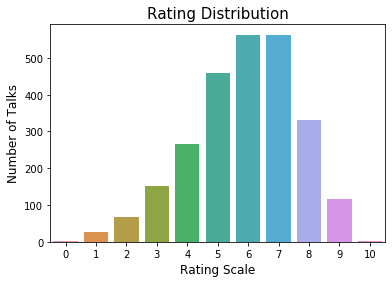

In [9]:
sns.countplot(x = kmeans.labels_)
plt.title("Rating Distribution", fontsize=15)
plt.xlabel('Rating Scale', fontsize=12)
plt.ylabel('Number of Talks', fontsize=12)

In [10]:
# Adding the two columns Numeric Ratings and Negative Percentage to the DataFrame
# And storing them in a new csv file

new_df = df.copy(deep=True)
new_df['NumericRating'] = kmeans.labels_
new_df['Neg_Perc'] = neg_ratios
#new_df.to_csv('new_df.csv', index=False)

In [11]:
new_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,NumericRating,Neg_Perc
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,7,0.21
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,4,5.57
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,3,3.34
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,7,0.73
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,6,0.22


In [12]:
new_df['NumericRating'].value_counts().sort_index()

0       2
1      27
2      68
3     153
4     266
5     458
6     563
7     563
8     330
9     117
10      3
Name: NumericRating, dtype: int64

In [13]:
median_data = new_df.groupby(['NumericRating']).median()[1:]

In [14]:
median_data

,comments,duration,film_date,languages,num_speaker,published_date,views,Neg_Perc
NumericRating,,,,,,,,
1,64.0,813.0,1.172880e+09,24.0,1.0,1.228352e+09,606311.0,21.320
2,116.0,590.5,1.261786e+09,28.0,1.0,1.271957e+09,791435.0,9.505
3,110.0,716.0,1.265760e+09,26.0,1.0,1.275304e+09,814568.0,5.920
4,133.0,778.0,1.298938e+09,28.0,1.0,1.303914e+09,1019070.0,3.110
5,126.5,828.0,1.320840e+09,28.0,1.0,1.328846e+09,1110330.5,1.760
6,121.0,849.0,1.334880e+09,28.0,1.0,1.346944e+09,1123482.0,1.010
7,109.0,875.0,1.370909e+09,27.0,1.0,1.381764e+09,1172298.0,0.640
8,108.0,900.5,1.373242e+09,29.0,1.0,1.385525e+09,1325642.5,0.430
9,145.0,889.0,1.386202e+09,30.0,1.0,1.395241e+09,1818659.0,0.370


Text(0, 0.5, 'Number of Views')

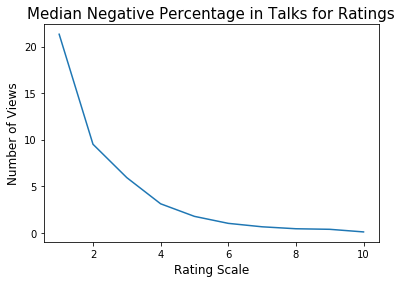

In [15]:
plt.plot(median_data['Neg_Perc'])
plt.title("Median Negative Percentage in Talks for Ratings", fontsize=15)
plt.xlabel("Rating Scale", fontsize=12)
plt.ylabel("Number of Views", fontsize=12)

Text(0, 0.5, 'Number of Views')

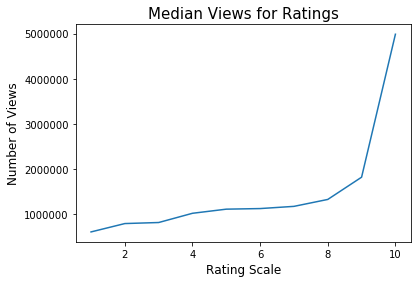

In [16]:
plt.plot(median_data['views'])
plt.title("Median Views for Ratings", fontsize=15)
plt.xlabel("Rating Scale", fontsize=12)
plt.ylabel("Number of Views", fontsize=12)

Text(0, 0.5, 'Number of Comments')

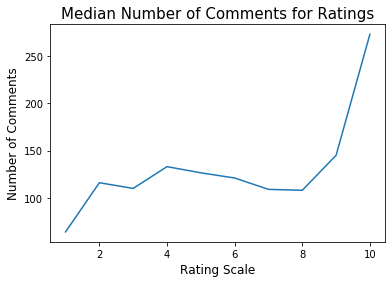

In [17]:
plt.plot(median_data['comments'])
plt.title("Median Number of Comments for Ratings", fontsize=15)
plt.xlabel("Rating Scale", fontsize=12)
plt.ylabel("Number of Comments", fontsize=12)

Text(0, 0.5, 'Number of Languages')

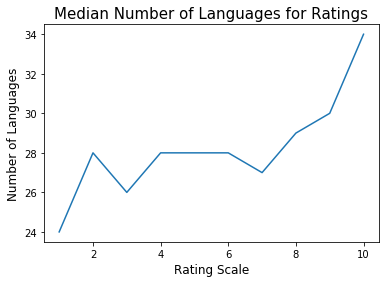

In [18]:
plt.plot(median_data['languages'])
plt.title("Median Number of Languages for Ratings", fontsize=15)
plt.xlabel("Rating Scale", fontsize=12)
plt.ylabel("Number of Languages", fontsize=12)

Text(0, 0.5, 'Duration of Talks')

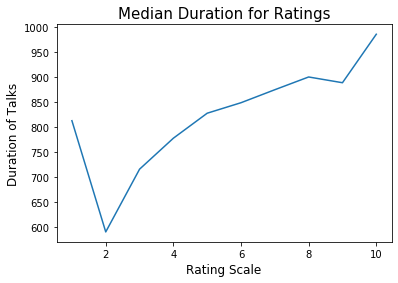

In [19]:
plt.plot(median_data['duration'])
plt.title("Median Duration for Ratings", fontsize=15)
plt.xlabel("Rating Scale", fontsize=12)
plt.ylabel("Duration of Talks", fontsize=12)

In [20]:
mean_data = new_df.groupby(['NumericRating']).mean()[1:]

In [21]:
mean_data

,comments,duration,film_date,languages,num_speaker,published_date,views,Neg_Perc
NumericRating,,,,,,,,
1,122.592593,706.370370,1.204339e+09,25.185185,1.037037,1.264355e+09,7.201692e+05,21.585185
2,127.117647,632.808824,1.231156e+09,26.941176,1.014706,1.280608e+09,1.114811e+06,9.565588
3,155.176471,760.477124,1.258969e+09,26.189542,1.045752,1.292901e+09,1.471634e+06,5.628301
4,209.909774,797.281955,1.281389e+09,27.150376,1.075188,1.308389e+09,1.402611e+06,3.249248
5,199.421397,796.443231,1.303861e+09,27.203057,1.043668,1.327583e+09,1.566853e+06,1.908843
6,199.028419,831.641208,1.330548e+09,27.326821,1.023091,1.348453e+09,1.482329e+06,1.173694
7,181.142096,861.833037,1.351388e+09,26.847247,1.008881,1.368003e+09,1.753188e+06,0.751883
8,181.115152,893.869697,1.359136e+09,28.442424,1.012121,1.372944e+09,2.113793e+06,0.506030
9,257.367521,837.769231,1.357810e+09,29.461538,1.008547,1.381929e+09,3.299149e+06,0.389829


Text(0, 0.5, 'Average Negativity Percentage')

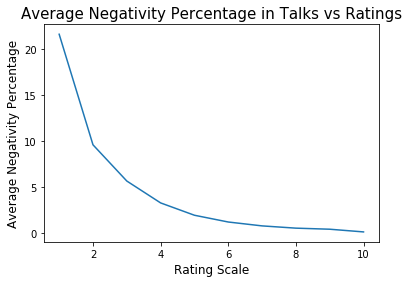

In [22]:
plt.plot(mean_data['Neg_Perc'])
plt.title("Average Negativity Percentage in Talks vs Ratings", fontsize=15)
plt.xlabel("Rating Scale", fontsize=12)
plt.ylabel("Average Negativity Percentage", fontsize=12)

Text(0, 0.5, 'Average Number of Views')

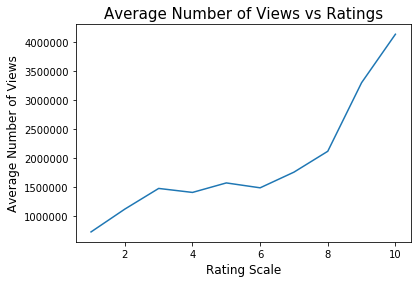

In [23]:
plt.plot(mean_data['views'])
plt.title("Average Number of Views vs Ratings", fontsize=15)
plt.xlabel("Rating Scale", fontsize=12)
plt.ylabel("Average Number of Views", fontsize=12)

Text(0, 0.5, 'Average Number of Comments')

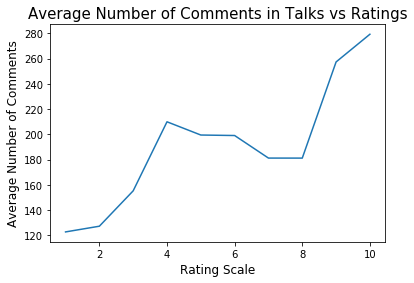

In [24]:
plt.plot(mean_data['comments'])
plt.title("Average Number of Comments in Talks vs Ratings", fontsize=15)
plt.xlabel("Rating Scale", fontsize=12)
plt.ylabel("Average Number of Comments", fontsize=12)

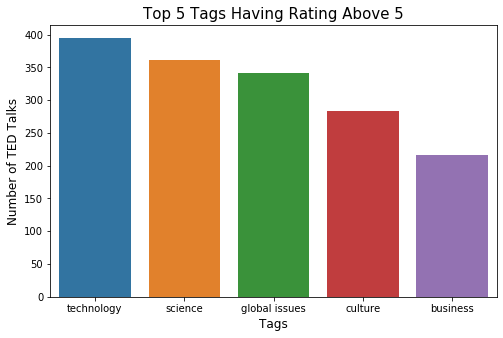

In [25]:
# top tags for talks with rating = 6 or above

top_tags = []

for i in range(2550):
    if new_df['NumericRating'][i]>=6:
        top_tags.extend(eval(df.tags[i]))

top_tags = pd.Series(top_tags)
x = dict(top_tags.value_counts()[0:6])
x.pop('TEDx')
plt.subplots(figsize=[8,5])
sns.barplot(list(x.keys()), list(x.values()))
plt.title('Top 5 Tags Having Rating Above 5', fontsize=15)
plt.xlabel("Tags", fontsize=12)
plt.ylabel("Number of TED Talks", fontsize=12)
plt.show()